In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import PIL

In [2]:
present_data = pd.read_csv("world_filtered_data.csv")

In [122]:
future_RNN = pd.read_csv('future_RNN.csv')
future_arima = pd.read_csv('future_arima.csv')
future_prophet = pd.read_csv("future_prophet.csv")

In [150]:
time_series_frame = pd.date_range(start=datetime(2021,9,7),periods=140)
time_series_frame = pd.DataFrame(time_series_frame,columns=['date'])

In [152]:
present_data

,date,daily_vaccinations,total_vaccinations,percentage_people_vaccinated
0,2020-12-01,0.0,0.000000e+00,0.000000
1,2020-12-02,0.0,0.000000e+00,0.000000
2,2020-12-03,0.0,0.000000e+00,0.000000
3,2020-12-04,0.0,0.000000e+00,0.000000
4,2020-12-05,0.0,0.000000e+00,0.000000
...,...,...,...,...
325,2021-10-22,24551397.0,6.851279e+09,42.646344
326,2021-10-23,25374934.0,6.876654e+09,42.804292
327,2021-10-24,24726686.0,6.901381e+09,42.958206
328,2021-10-25,22944888.0,6.924326e+09,43.101028


In [125]:
future_RNN = future_RNN.to_numpy()

In [127]:
future_RNN = future_RNN[:,-1].reshape(-1,1)

In [129]:
future_arima = future_arima.to_numpy()

In [133]:
future_arima = future_arima[-90:,-1].reshape(-1,1)

In [137]:
future_prophet = future_prophet.to_numpy()

In [139]:
future_prophet = future_prophet[:,-1].reshape(-1,1)

In [142]:
mix = np.concatenate((future_RNN,future_arima),axis=1)

In [143]:
mix = np.concatenate((mix,future_prophet),axis=1)

# present + mix

In [161]:
present = present_data.to_numpy()

In [162]:
present = present[-50:,-1].reshape(-1,1)

In [164]:
present1 = np.concatenate((present,present),axis=1)

In [165]:
present2 = np.concatenate((present1,present),axis=1)

In [169]:
total_future_data = np.concatenate((present2,mix),axis=0)

In [172]:
pred_data_frame = pd.DataFrame(total_future_data,columns=['RNN','ARIMA','PROPHET'])

In [174]:
pred_data_frame['date'] = time_series_frame

In [178]:
pred_data_frame.set_index('date',inplace=True)

In [181]:
present_data = pred_data_frame.iloc[0:50,:]

<AxesSubplot:xlabel='date'>

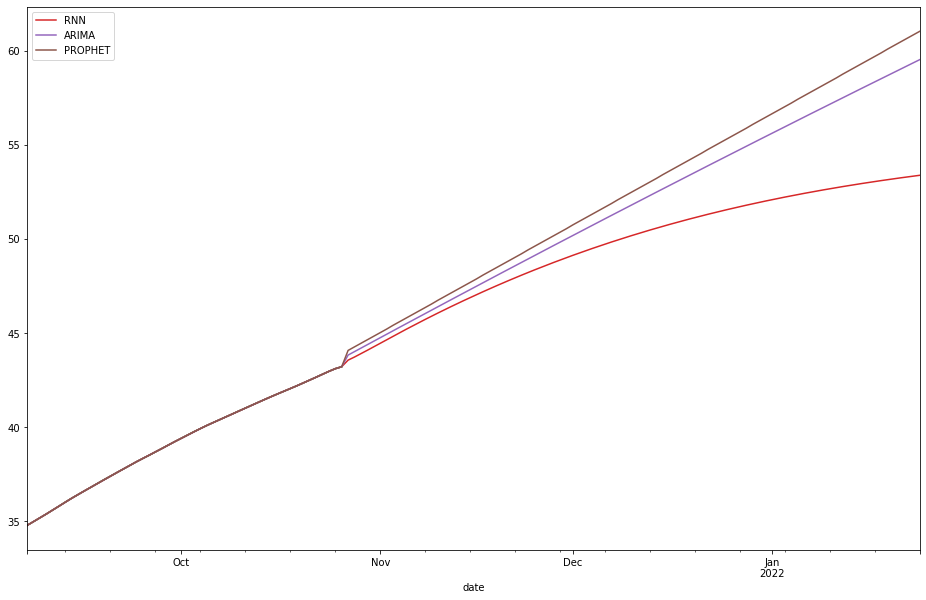

In [196]:
ax = present_data.plot(figsize=(16,10),legend=False)
pred_data_frame.plot(ax=ax)

In [ ]:
pred_data_frame